In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("C:/ML/carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [3]:
pd.get_dummies(df['Car Model'])

,Audi A5,BMW X5,Mercedez Benz C class
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
5,True,False,False
6,True,False,False
7,True,False,False
8,True,False,False
9,False,False,True


In [4]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore').set_output(transform='pandas')

In [5]:
encoded_data = ohe.fit_transform(df[['Car Model']])

In [6]:
final = pd.concat([df, encoded_data], axis=1)
final

,Car Model,Mileage,Sell Price($),Age(yrs),Car Model_Audi A5,Car Model_BMW X5,Car Model_Mercedez Benz C class
0,BMW X5,69000,18000,6,0.0,1.0,0.0
1,BMW X5,35000,34000,3,0.0,1.0,0.0
2,BMW X5,57000,26100,5,0.0,1.0,0.0
3,BMW X5,22500,40000,2,0.0,1.0,0.0
4,BMW X5,46000,31500,4,0.0,1.0,0.0
5,Audi A5,59000,29400,5,1.0,0.0,0.0
6,Audi A5,52000,32000,5,1.0,0.0,0.0
7,Audi A5,72000,19300,6,1.0,0.0,0.0
8,Audi A5,91000,12000,8,1.0,0.0,0.0
9,Mercedez Benz C class,67000,22000,6,0.0,0.0,1.0


#### Dummy Variable Trap
When you can derive one variable from other variables, they are known to be multi-colinear. Here if you know values of california and georgia then you can easily infer value of new jersey state, i.e. california=0 and georgia=0. There for these state variables are called to be multi-colinear. In this situation linear regression won't work as expected. Hence you need to drop one column.

NOTE: sklearn library takes care of dummy variable trap hence even if you don't drop one of the state columns it is going to work, however we should make a habit of taking care of dummy variable trap ourselves just in case library that you are using is not handling this for you

In [15]:
#Making 2 dummies variables better than 3 and set two of them to zero to choose the removed one
X = final.drop(['Car Model', 'Sell Price($)', 'Car Model_Mercedez Benz C class'],axis=1)
Y = final['Sell Price($)']
X

,Mileage,Age(yrs),Car Model_Audi A5,Car Model_BMW X5
0,69000,6,0.0,1.0
1,35000,3,0.0,1.0
2,57000,5,0.0,1.0
3,22500,2,0.0,1.0
4,46000,4,0.0,1.0
5,59000,5,1.0,0.0
6,52000,5,1.0,0.0
7,72000,6,1.0,0.0
8,91000,8,1.0,0.0
9,67000,6,0.0,0.0


In [16]:
Y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [17]:
model = LinearRegression()

In [18]:
model.fit(X, Y)

LinearRegression()

In [19]:
# Mercedes with 45000 millage and 4 years
model.predict([[45000, 4, 0, 0]])

c:\Users\hamza\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [20]:
# X5 7 yrs 86000 mileage
model.predict([[86000, 7, 0, 1]])

c:\Users\hamza\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [21]:
model.score(X, Y)

0.9417050937281082

In [23]:
import joblib
joblib.dump(model, 'Cars prices.pkl')

['Cars prices.pkl']

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

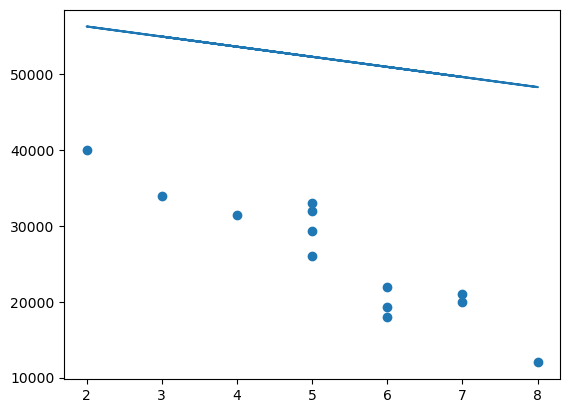

In [38]:
plt.scatter(final['Age(yrs)'], final['Sell Price($)'])
plt.plot(final['Age(yrs)'], model.coef_[1] * final['Age(yrs)'] + model.intercept_)

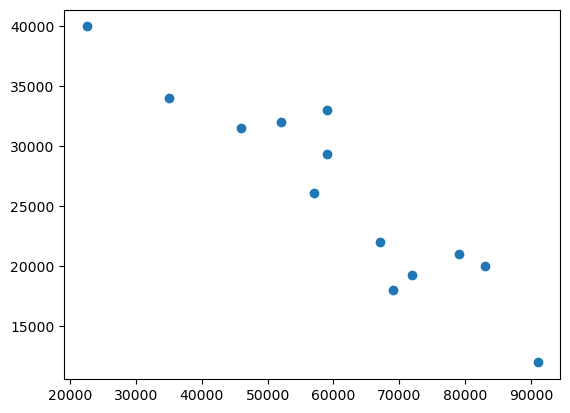

In [30]:
plt.scatter(final['Mileage'], final['Sell Price($)'])